#Automated ETL Pipeline using Sleep Health & Lifestyle Data

#1.Objective:
Build an automated pipeline to preprocess, transform, and load sleep health data
for analyzing Sleep Disorder.


#2.Import Libraries

In [ ]:
# Core Libraries
import warnings
warnings.filterwarnings('ignore')

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import zscore

# Machine Learning - Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Saving Artifacts
import os
import joblib


#3. Extract – Load Raw Data

In [ ]:
sleep=pd.read_csv('sleep_health_lifestyle_dataset.csv')

In [ ]:
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Female,36,Student,4.5,7.9,73,7,Normal,118/66,64,14497,Sleep Apnea
396,397,Female,45,Manual Labor,6.0,6.1,72,8,Obese,132/80,65,12848,Insomnia
397,398,Female,30,Student,5.3,6.5,58,10,Obese,125/76,66,15255,Insomnia
398,399,Female,41,Retired,11.0,9.1,73,9,Obese,130/75,75,6567,Sleep Apnea


#4.Drop Non-Useful Column (Person ID)

In [ ]:
#Drop Non-Useful Column (Person ID)
sleep.drop(columns=["Person ID"], inplace=True)

Removes unique ID column because it does not contribute to analysis.

#5.Basic Checks

In [ ]:
sleep.head()

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [ ]:
sleep.tail()

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
395,Female,36,Student,4.5,7.9,73,7,Normal,118/66,64,14497,Sleep Apnea
396,Female,45,Manual Labor,6.0,6.1,72,8,Obese,132/80,65,12848,Insomnia
397,Female,30,Student,5.3,6.5,58,10,Obese,125/76,66,15255,Insomnia
398,Female,41,Retired,11.0,9.1,73,9,Obese,130/75,75,6567,Sleep Apnea
399,Male,37,Retired,5.8,7.0,41,6,Normal,118/70,51,18079,NaN


In [ ]:
sleep.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration (hours)',
       'Quality of Sleep (scale: 1-10)',
       'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)',
       'BMI Category', 'Blood Pressure (systolic/diastolic)',
       'Heart Rate (bpm)', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [ ]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 400 non-null    object 
 1   Age                                    400 non-null    int64  
 2   Occupation                             400 non-null    object 
 3   Sleep Duration (hours)                 400 non-null    float64
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64
 5   Physical Activity Level (minutes/day)  400 non-null    int64  
 6   Stress Level (scale: 1-10)             400 non-null    int64  
 7   BMI Category                           400 non-null    object 
 8   Blood Pressure (systolic/diastolic)    400 non-null    object 
 9   Heart Rate (bpm)                       400 non-null    int64  
 10  Daily Steps                            400 non-null    int64  
 11  Sleep 

In [ ]:
sleep.dtypes

,0
Gender,object
Age,int64
Occupation,object
Sleep Duration (hours),float64
Quality of Sleep (scale: 1-10),float64
Physical Activity Level (minutes/day),int64
Stress Level (scale: 1-10),int64
BMI Category,object
Blood Pressure (systolic/diastolic),object
Heart Rate (bpm),int64


In [ ]:
sleep.describe()

,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,39.950000,8.041250,6.125750,64.985000,5.47250,75.990000,11076.510000
std,14.038883,2.390787,1.975733,32.297874,2.80873,15.099334,5364.789364
min,18.000000,4.100000,1.000000,10.000000,1.00000,50.000000,2067.000000
25%,29.000000,5.900000,4.700000,35.000000,3.00000,63.000000,6165.250000
50%,40.000000,8.200000,6.100000,65.500000,5.00000,77.000000,11785.500000
75%,49.000000,10.125000,7.425000,94.000000,8.00000,90.000000,15878.000000
max,90.000000,12.000000,10.000000,120.000000,10.00000,100.000000,19958.000000


In [ ]:
sleep.describe(include='object').T

,count,unique,top,freq
Gender,400,2,Female,201
Occupation,400,4,Student,110
BMI Category,400,4,Overweight,109
Blood Pressure (systolic/diastolic),400,250,109/60,17
Sleep Disorder,110,2,Insomnia,79


#6.Exploratory Data Analysis (EDA)


In [ ]:
sleep.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration (hours),0
Quality of Sleep (scale: 1-10),0
Physical Activity Level (minutes/day),0
Stress Level (scale: 1-10),0
BMI Category,0
Blood Pressure (systolic/diastolic),0
Heart Rate (bpm),0


In [ ]:
sleep["Sleep Disorder"] = sleep["Sleep Disorder"].fillna("No Disorder")


Missing sleep disorder values are treated as “No Disorder”.

In [ ]:
sleep.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration (hours),0
Quality of Sleep (scale: 1-10),0
Physical Activity Level (minutes/day),0
Stress Level (scale: 1-10),0
BMI Category,0
Blood Pressure (systolic/diastolic),0
Heart Rate (bpm),0


In [ ]:
sleep.duplicated().sum()

np.int64(0)

Ensures no duplicate records exist.

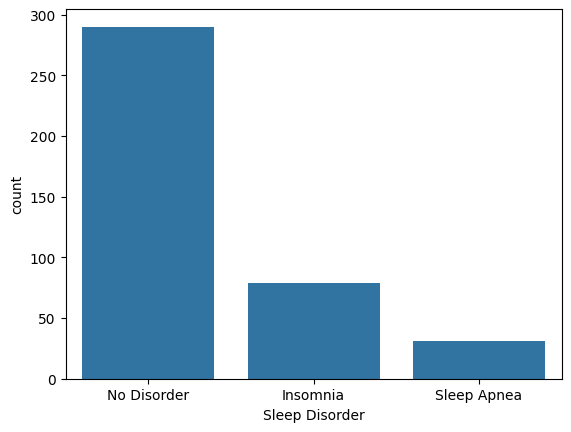

In [ ]:
#Target Column
sns.countplot(data=sleep, x="Sleep Disorder")
plt.show()

Target column is imbalanced

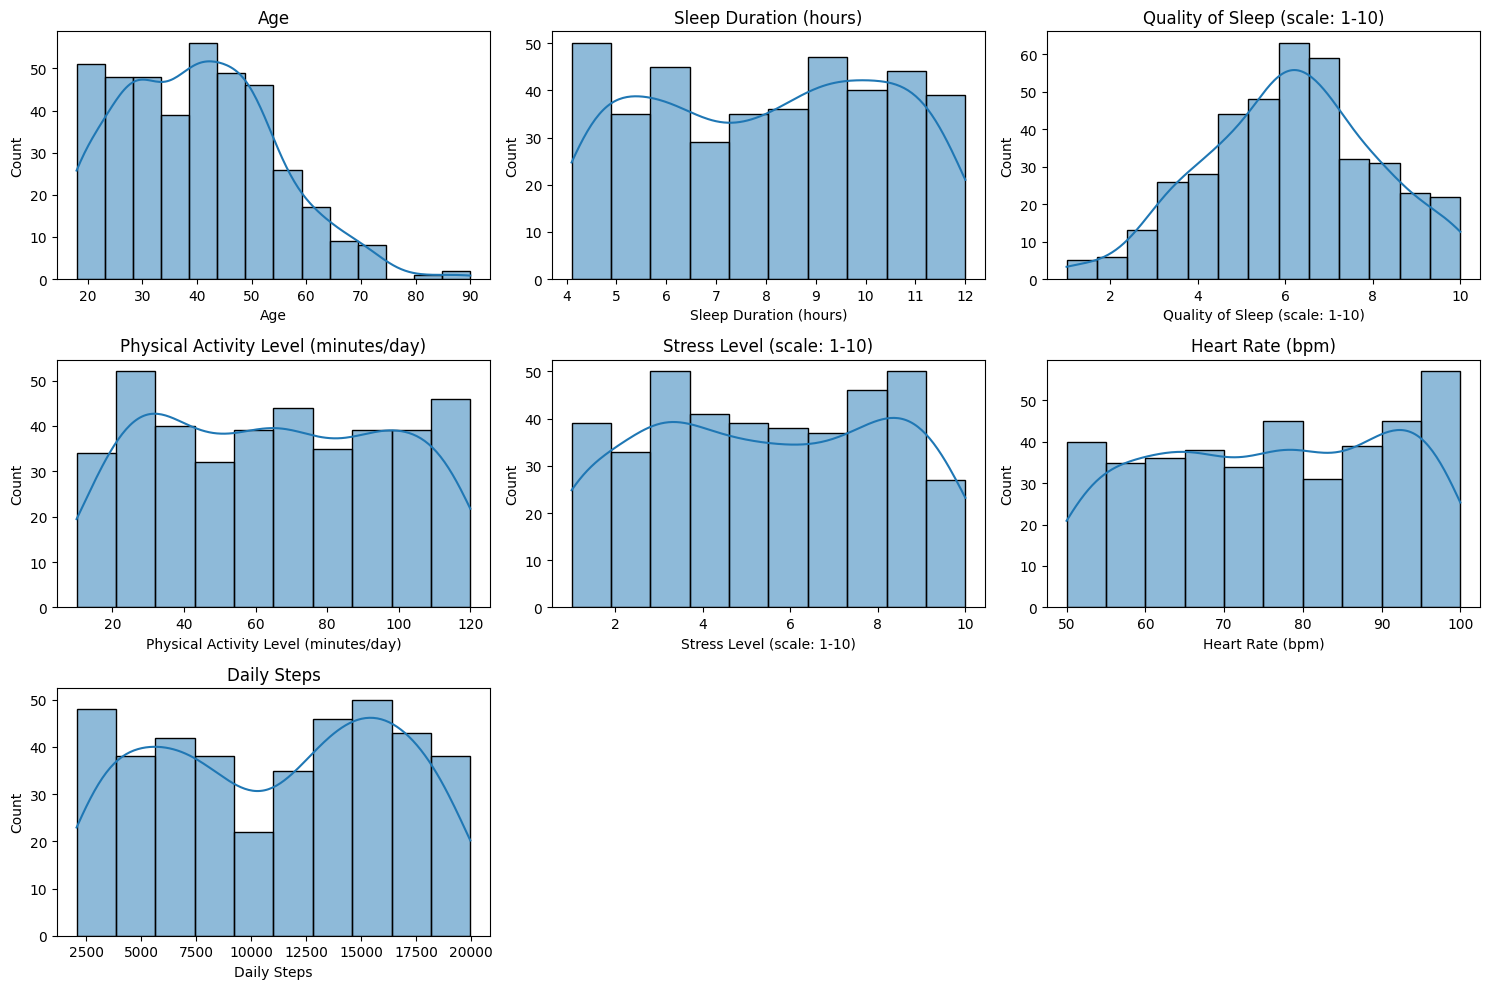

In [ ]:
num_cols = sleep.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(sleep[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


Visualizes how numerical values are distributed.

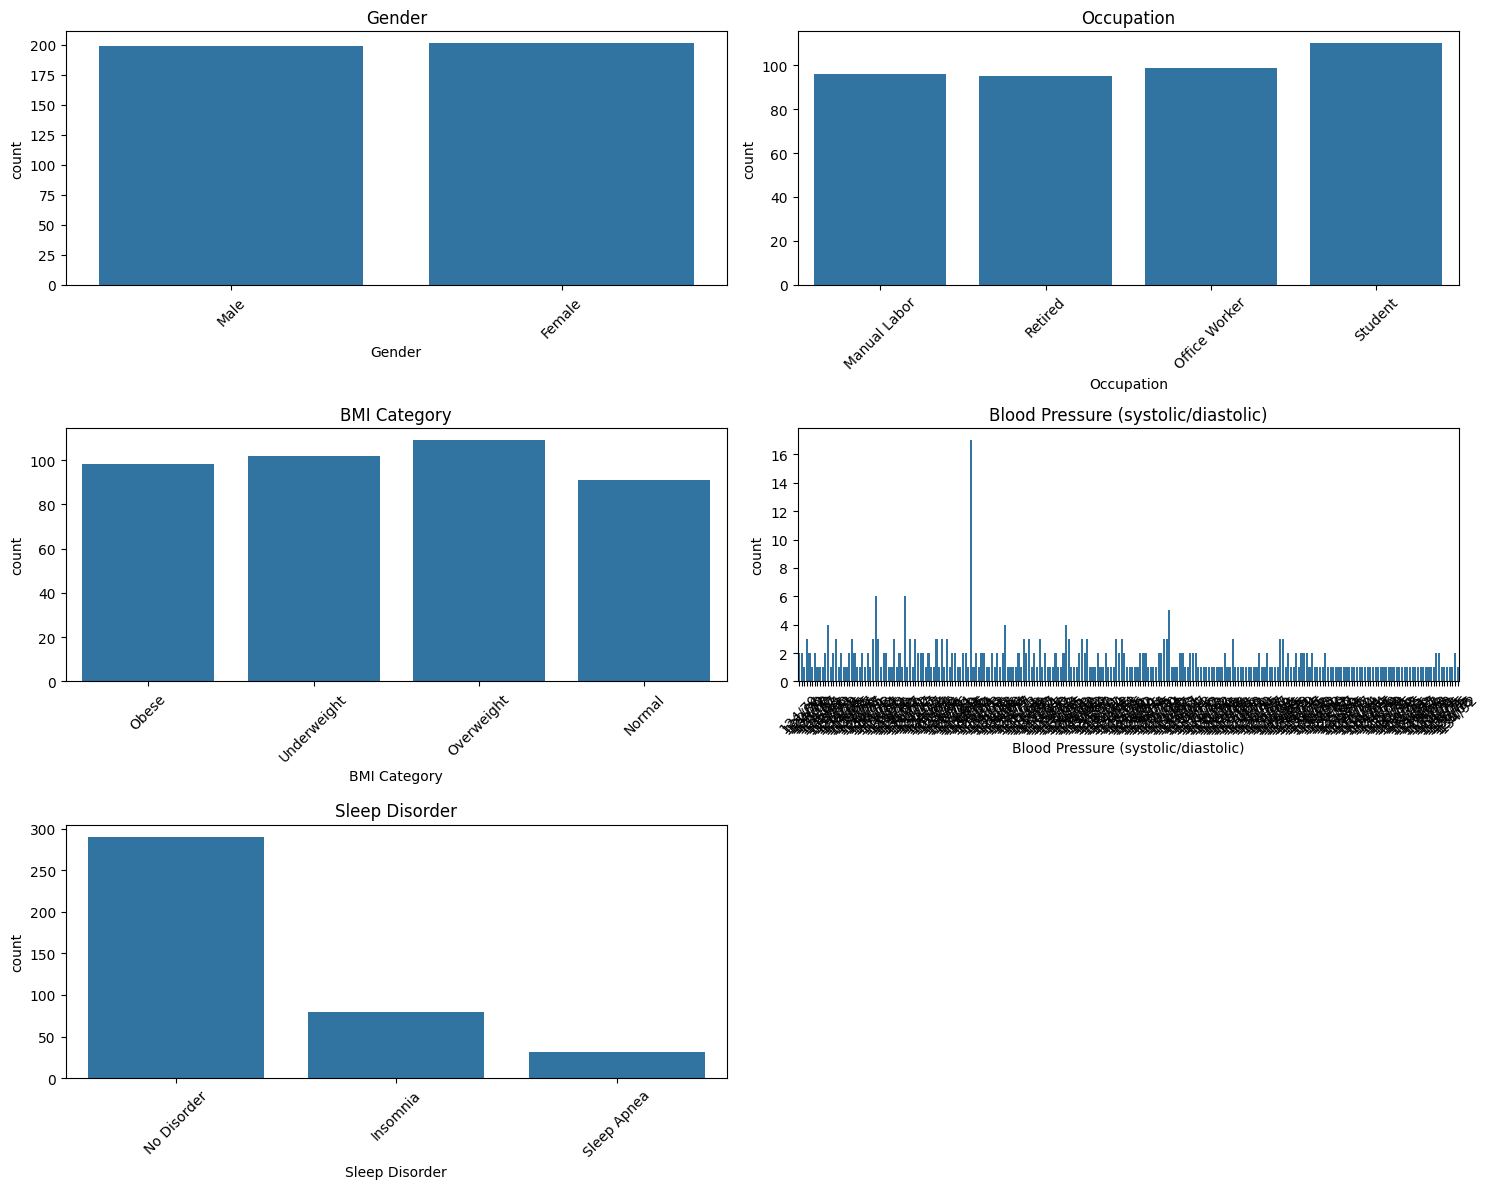

In [ ]:
cat_cols = sleep.select_dtypes(include=["object"]).columns
n_cols = 2
n_rows = int(np.ceil(len(cat_cols) / n_cols))

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=sleep, x=col)
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()


Shows frequency of categorical variables.

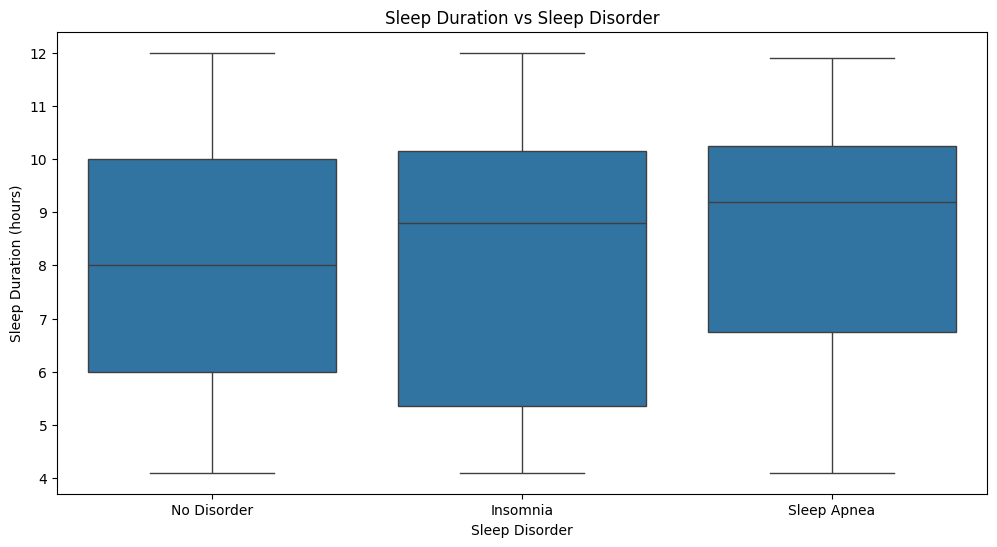

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=sleep, x="Sleep Disorder", y="Sleep Duration (hours)")
plt.title("Sleep Duration vs Sleep Disorder")
plt.show()


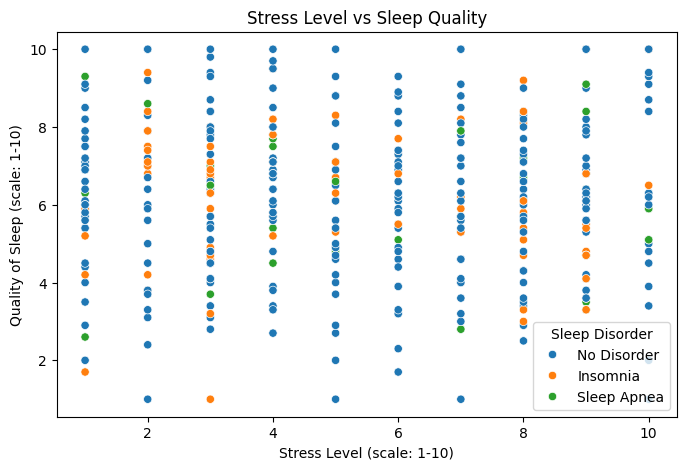

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=sleep,
    x="Stress Level (scale: 1-10)",
    y="Quality of Sleep (scale: 1-10)",
    hue="Sleep Disorder"
)
plt.title("Stress Level vs Sleep Quality")
plt.show()


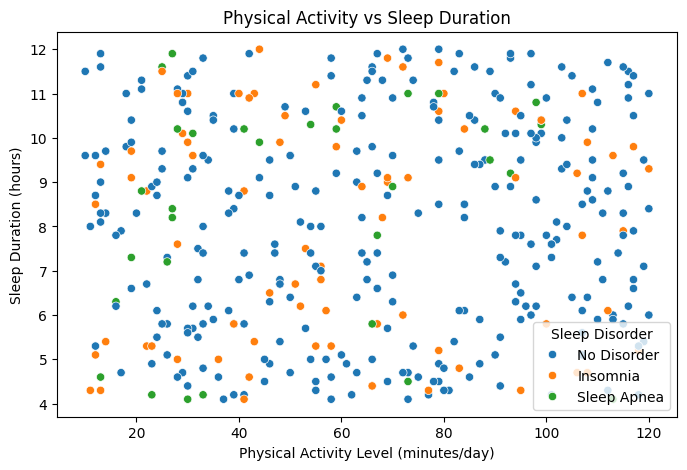

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=sleep,
    x="Physical Activity Level (minutes/day)",
    y="Sleep Duration (hours)",
    hue="Sleep Disorder"
)
plt.title("Physical Activity vs Sleep Duration")
plt.show()


Understands relationship between:

- Sleep disorder & sleep duration

- Stress & sleep quality

- Physical activity & sleep duration

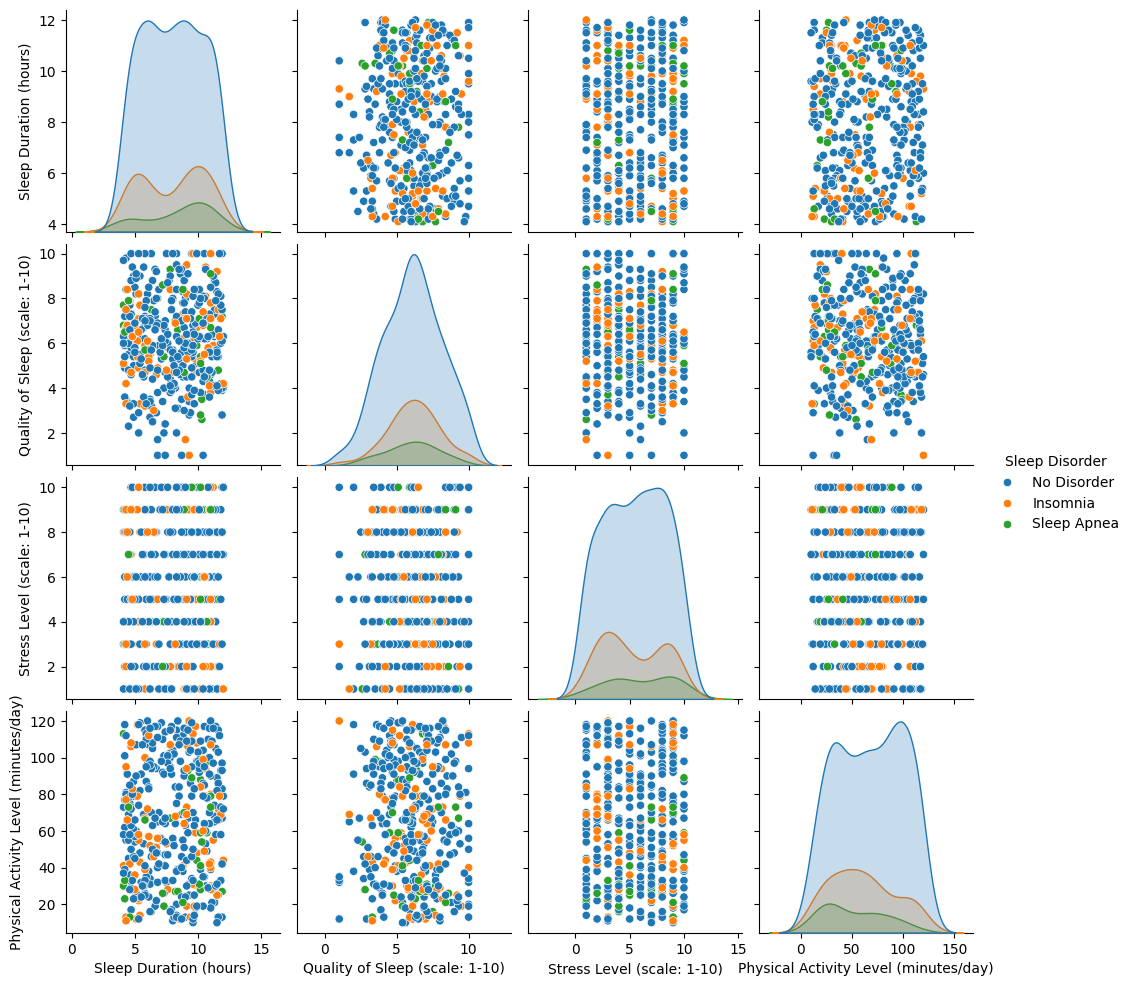

In [ ]:
selected_features = [
    "Sleep Duration (hours)",
    "Quality of Sleep (scale: 1-10)",
    "Stress Level (scale: 1-10)",
    "Physical Activity Level (minutes/day)",
    "Sleep Disorder"
]

sns.pairplot(sleep[selected_features], hue="Sleep Disorder")
plt.show()


Shows relationships between multiple features at once.

#7.Feature Engineering

In [ ]:
bp_split = sleep["Blood Pressure (systolic/diastolic)"].str.split("/", expand=True)
sleep["Systolic BP"] = pd.to_numeric(bp_split[0])
sleep["Diastolic BP"] = pd.to_numeric(bp_split[1])

sleep.drop(columns=["Blood Pressure (systolic/diastolic)"], inplace=True)


- Splits blood pressure into systolic and diastolic values.
- Removes original column after extracting useful features.

In [ ]:
sleep

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Heart Rate (bpm),Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,29,Manual Labor,7.4,7.0,41,7,Obese,91,8539,No Disorder,124,70
1,Female,43,Retired,4.2,4.9,41,5,Obese,81,18754,No Disorder,131,86
2,Male,44,Retired,6.1,6.0,107,4,Underweight,81,2857,No Disorder,122,70
3,Male,29,Office Worker,8.3,10.0,20,10,Obese,55,6886,No Disorder,124,72
4,Male,67,Retired,9.1,9.5,19,4,Overweight,97,14945,Insomnia,133,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Female,36,Student,4.5,7.9,73,7,Normal,64,14497,Sleep Apnea,118,66
396,Female,45,Manual Labor,6.0,6.1,72,8,Obese,65,12848,Insomnia,132,80
397,Female,30,Student,5.3,6.5,58,10,Obese,66,15255,Insomnia,125,76
398,Female,41,Retired,11.0,9.1,73,9,Obese,75,6567,Sleep Apnea,130,75


#8.Outlier Handling

In [ ]:
num_cols = sleep.select_dtypes(include=["int64", "float64"]).columns


In [ ]:
outlier_summary = {}

for col in num_cols:
    Q1 = sleep[col].quantile(0.25)
    Q3 = sleep[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = sleep[(sleep[col] < lower) | (sleep[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary


{'Age': 3,
 'Sleep Duration (hours)': 0,
 'Quality of Sleep (scale: 1-10)': 0,
 'Physical Activity Level (minutes/day)': 0,
 'Stress Level (scale: 1-10)': 0,
 'Heart Rate (bpm)': 0,
 'Daily Steps': 0,
 'Systolic BP': 0,
 'Diastolic BP': 0}

Identifies extreme values using Interquartile Range.

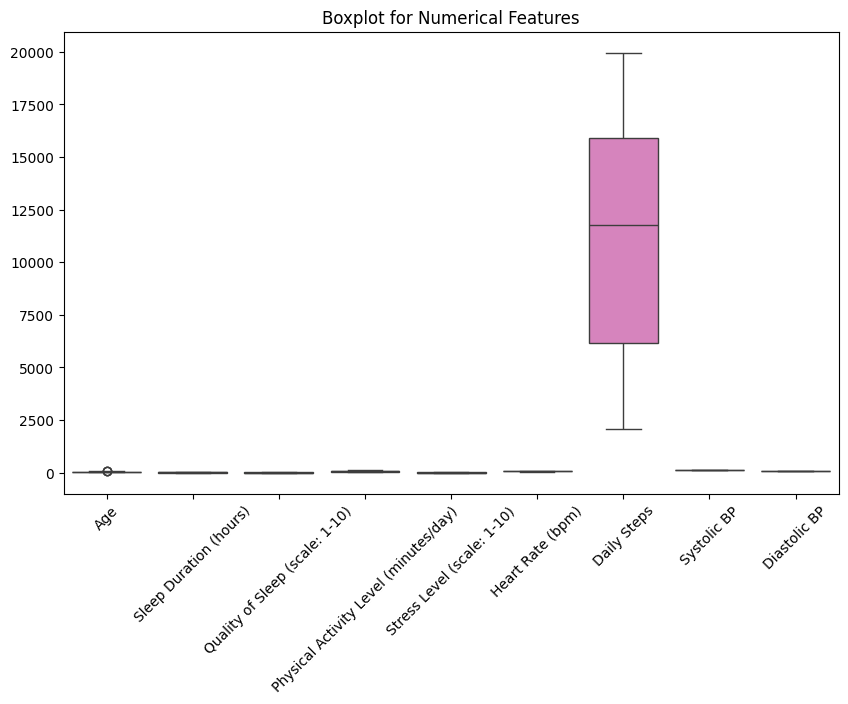

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=sleep[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Features")
plt.show()


In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(sleep[num_cols]))
outlier_rows = (z_scores > 3).any(axis=1)

sleep[outlier_rows].shape


(2, 13)

In [ ]:
Identifies statistically extreme data points.

In [ ]:
Q1 = sleep["Age"].quantile(0.25)
Q3 = sleep["Age"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

sleep["Age"] = np.clip(sleep["Age"], lower, upper)


Caps extreme age values instead of deleting rows.

✔ Prevents data loss
✔ Keeps dataset balanced

In [ ]:
# Recalculate outliers for Age
outliers_after = sleep[(sleep["Age"] < lower) | (sleep["Age"] > upper)]
outliers_after.shape


(0, 13)

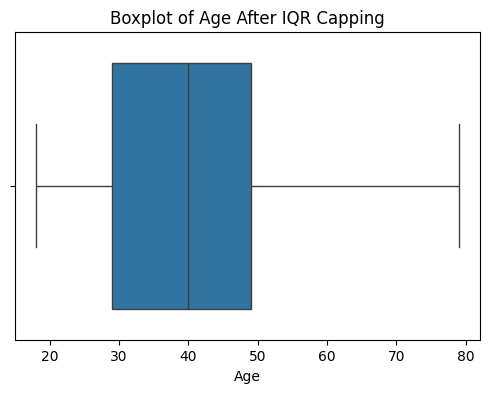

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=sleep["Age"])
plt.title("Boxplot of Age After IQR Capping")
plt.xlabel("Age")
plt.show()


#9.Correlation and Multicollinearity check

In [ ]:
num_cols = sleep.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['Age', 'Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)',
       'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)',
       'Heart Rate (bpm)', 'Daily Steps', 'Systolic BP', 'Diastolic BP'],
      dtype='object')

In [ ]:
sleep[num_cols].corr()

,Age,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),Heart Rate (bpm),Daily Steps,Systolic BP,Diastolic BP
Age,1.000000,0.068950,-0.006712,0.031069,0.060156,0.013355,0.031361,0.852661,0.733853
Sleep Duration (hours),0.068950,1.000000,-0.001706,0.053806,0.054120,0.006808,-0.054948,0.065106,0.069865
Quality of Sleep (scale: 1-10),-0.006712,-0.001706,1.000000,-0.032573,-0.015295,0.067353,-0.043098,-0.000163,-0.029517
Physical Activity Level (minutes/day),0.031069,0.053806,-0.032573,1.000000,-0.002160,-0.063202,0.013940,0.053925,0.013394
Stress Level (scale: 1-10),0.060156,0.054120,-0.015295,-0.002160,1.000000,0.075105,-0.022017,0.082650,0.072823
Heart Rate (bpm),0.013355,0.006808,0.067353,-0.063202,0.075105,1.000000,-0.028320,-0.002745,0.011805
Daily Steps,0.031361,-0.054948,-0.043098,0.013940,-0.022017,-0.028320,1.000000,0.018988,0.037305
Systolic BP,0.852661,0.065106,-0.000163,0.053925,0.082650,-0.002745,0.018988,1.000000,0.863252
Diastolic BP,0.733853,0.069865,-0.029517,0.013394,0.072823,0.011805,0.037305,0.863252,1.000000


Shows relationship between numerical features.

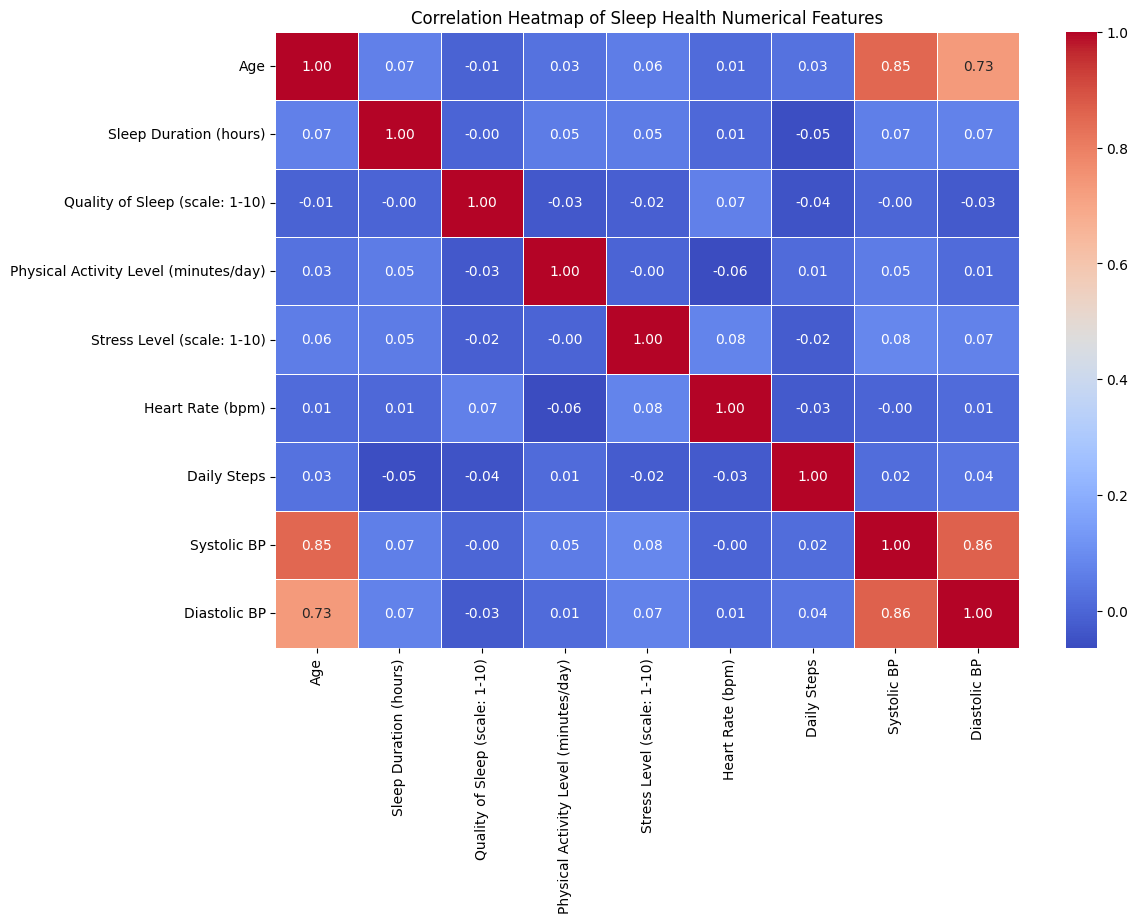

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    sleep[num_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Sleep Health Numerical Features")
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_cols = sleep.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['Age', 'Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)',
       'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)',
       'Heart Rate (bpm)', 'Daily Steps', 'Systolic BP', 'Diastolic BP'],
      dtype='object')

In [ ]:
X_vif = sleep[num_cols]
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data


,Feature,VIF
0,Age,16.839190
1,Sleep Duration (hours),12.332987
2,Quality of Sleep (scale: 1-10),10.696842
3,Physical Activity Level (minutes/day),5.139903
4,Stress Level (scale: 1-10),4.884752
5,Heart Rate (bpm),25.564392
6,Daily Steps,5.249277
7,Systolic BP,294.450529
8,Diastolic BP,232.553236


Identifies highly correlated features.

In [ ]:
sleep.drop(columns=["Diastolic BP"], inplace=True)


In [ ]:
Removes redundant feature to reduce multicollinearity.

#10.Define Features & Target

In [ ]:
X = sleep.drop("Sleep Disorder", axis=1)
y = sleep["Sleep Disorder"]


Separates input features and target variable.

In [ ]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

print("Numerical:", list(num_features))
print("Categorical:", list(cat_features))


Numerical: ['Age', 'Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)', 'Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)', 'Heart Rate (bpm)', 'Daily Steps', 'Systolic BP']
Categorical: ['Gender', 'Occupation', 'BMI Category']


#11.Build ETL Pipelines

In [ ]:

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


Fills missing values and scales numbers.

In [ ]:


cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


Handles missing categories and converts text into numeric format.

In [ ]:

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


Applies correct preprocessing to correct column types.

#12.Train–Test Split

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Splits data while maintaining class balance.

#13.Transform Data

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


Converts raw data into ML-ready format.

#14.Load – Save Outputs

In [ ]:
import os, joblib

os.makedirs("data/processed", exist_ok=True)
os.makedirs("artifacts", exist_ok=True)

pd.DataFrame(X_train_processed).to_csv("data/processed/X_train.csv", index=False)
pd.DataFrame(X_test_processed).to_csv("data/processed/X_test.csv", index=False)

y_train.to_csv("data/processed/y_train.csv", index=False)
y_test.to_csv("data/processed/y_test.csv", index=False)

joblib.dump(preprocessor, "artifacts/preprocessing_pipeline.joblib")


['artifacts/preprocessing_pipeline.joblib']

Saves:

Processed datasets

Preprocessing pipeline

✔ Enables reuse
✔ Supports production readiness

#15.Final Validation

In [ ]:
print("Train shape:", X_train_processed.shape)
print("Test shape:", X_test_processed.shape)


Train shape: (320, 18)
Test shape: (80, 18)


Confirms pipeline executed successfully.

#16. Conclusion

In this project, an automated ETL pipeline was developed to preprocess, transform,
and load sleep health and lifestyle data for sleep disorder analysis. The pipeline
handles missing values, performs domain-specific feature engineering, detects and
treats outliers, checks multicollinearity, and converts raw data into ML-ready
features using Scikit-learn pipelines. The final output includes processed datasets
and a reusable preprocessing pipeline, ensuring consistency and scalability for
future machine learning workflows.
